# Cunning Strategy

*Thou, thou, Lysander, thou hast given her rhymes,*      
*And interchang’d love-tokens with my child `$`.*      
*Thou hast by moonlight at her window sung,*      
*With feigning voice, verses of feigning love 🗡️;*     
*And stol’n the impression of her fantasy ❤️*      
-- [Egeus](https://www.gutenberg.org/files/1514/1514-h/1514-h.htm) 


Tokenization and commodification indeed fracture the embodied essence of "the thing," leaving behind an abstraction that feels hollow, even deceptive. This fear reverberates not just in societal dynamics but in poetic lamentations like Egeus’s complaint in *A Midsummer Night’s Dream*. Here, the exchange of rhymes and love-tokens between Lysander and Hermia embodies the very essence of commodification: the reduction of an authentic, ineffable connection into symbolic gestures—rhymes, tokens, and sung verses.

<iframe src="https://www.youtube.com/embed/xoTqgE46Tq8?start=1380"></iframe>

```{figure} ../figures/blanche.*
---
width: 1
height: 1
---
_Key Words: Civilization, Unification, Defense, Surveillance, Expensive, Tactics, Strategies, Longterm, Ideological, Gen-Z, Rootless, History, Adversarial Misinformation, Internet, Effective_. Born in Mogadishu, Somalia, Ayaan Hirsi Ali's journey is a testament to the resilience of the human spirit. Raised in a devout Somali Muslim family, Ayaan received a strict Muslim education and fled a forced marriage. Armed only with intellectual curiosity and unwavering determination, she sought refuge in the Netherlands, where she was first exposed to the ideas of the West. It was here that she found her voice, her passion for women's rights, and her commitment to challenging the status quo. Ayaan has become a prominent voice for reform within Islam and has dedicated her life to advocating for the rights of women, minorities, and dissidents living under oppressive regimes. Tune in for a compelling dialogue with one of the world's most fearless voices.
```

Egeus sees these tokens as simulacra, devoid of true substance. The "rhymes" and "verses of feigning love" are artificial constructs, tailored not to express but to manipulate. They “steal the impression of her fantasy,” transforming what should be a reciprocal bond into a scripted, one-sided transaction. Lysander’s tokens become tools of persuasion, more reflective of his strategic intent than his genuine affection. In this sense, Egeus’s critique aligns with the broader human anxiety about commodification—that it converts the relational into the transactional, severing the connection between the signifier and the authentic.

This tension parallels Hippolyta’s trajectory. Initially, she embodied adversarial independence, a force rooted in her Amazonian essence. But the triumph of Theseus tokenized her identity, reframing it as a cooperative symbol of Athenian stability. The marriage, like Lysander’s love tokens, becomes a feigned verse—a reduction of her complexity into an emblem of Theseus’s victory. While the tokens stabilize the network by creating social harmony and political capital, they are spectral representations, hollowed out of the essence they once sought to embody.

This unease resonates deeply in art, love, and society. Tokens and commodifications are tools of abstraction and efficiency, allowing complex relationships to be compressed into manageable forms. Yet, in their compression, they often fail to capture the embodied, organic nature of "the thing." Egeus’s lament and Hippolyta’s transformation alike highlight this gap, where the poetic fear of tokenization mirrors the sociological processes of reweighting adversarial nodes into commodified outputs. The tragedy lies not in the token’s existence but in the shadow it casts over the unspoken, the embodied, and the real.

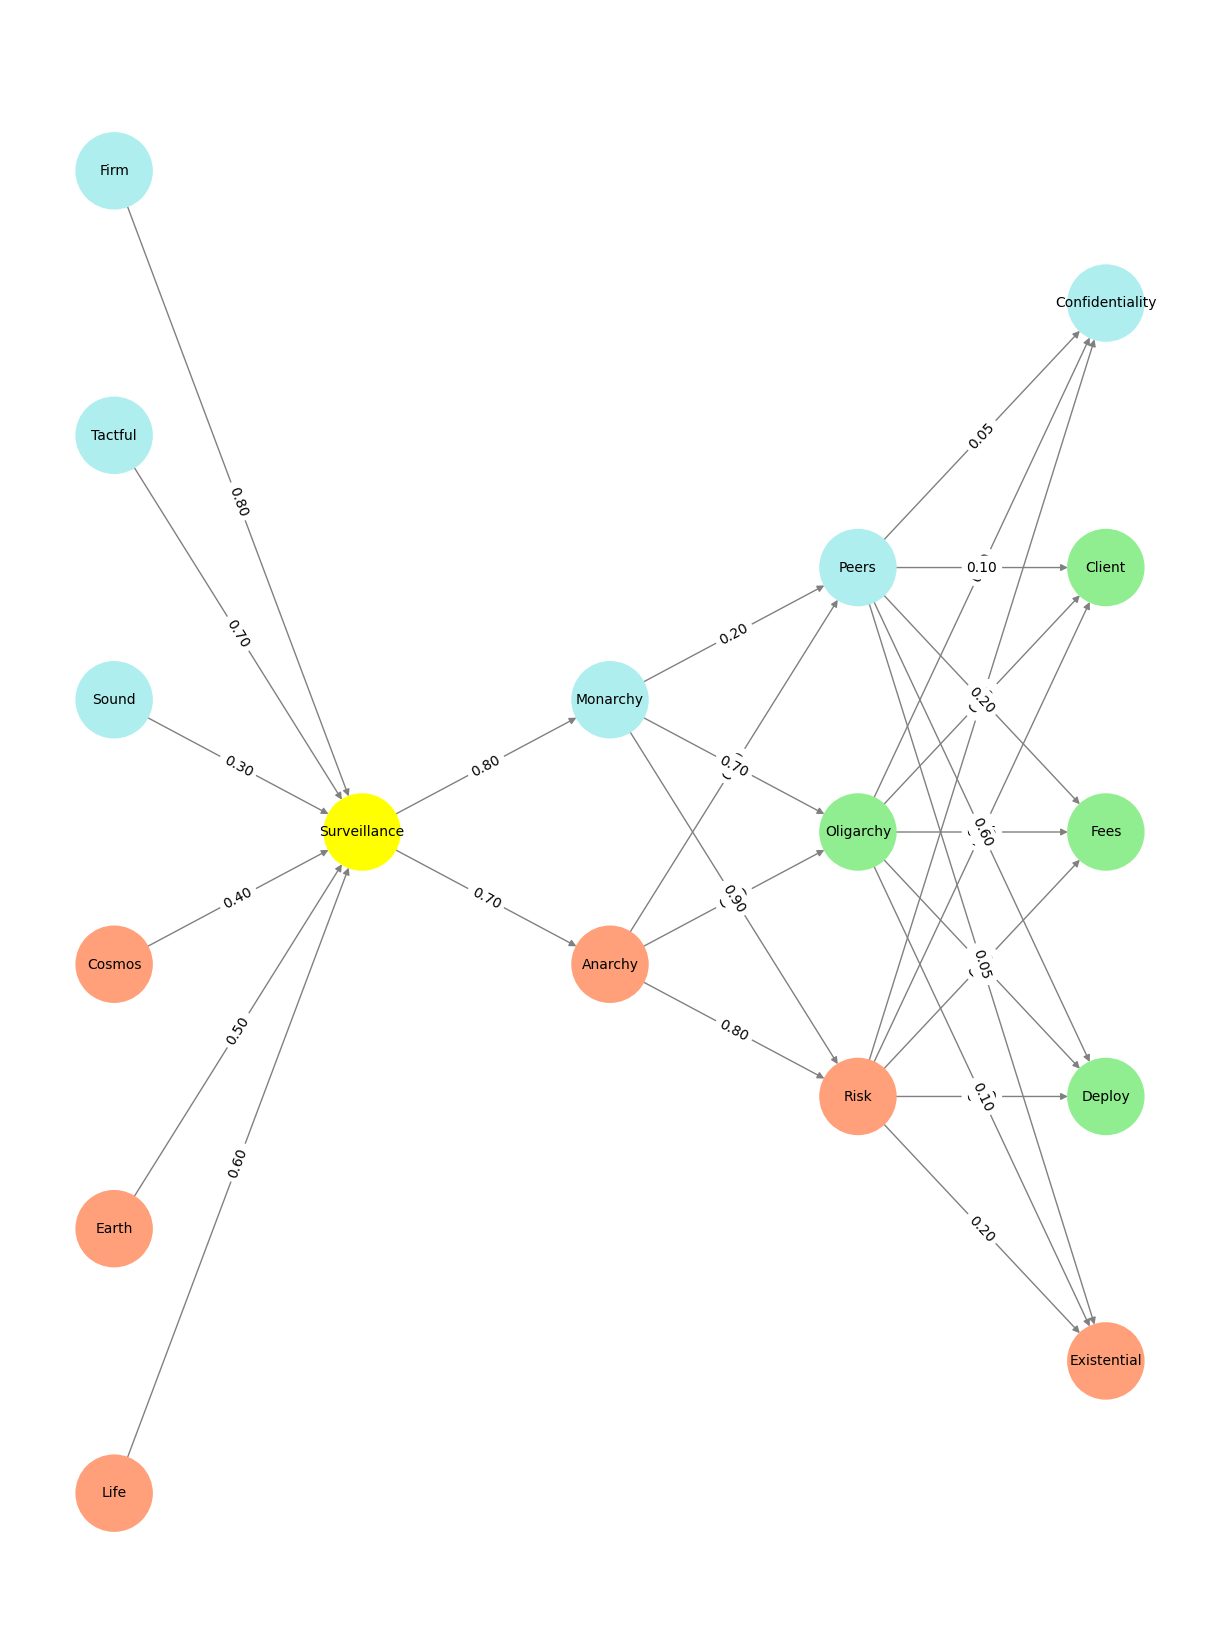

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Define the neural network structure
def define_layers():
    return {
        'Pre-Input': ['Life','Earth', 'Cosmos', 'Sound', 'Tactful', 'Firm', ],
        'Yellowstone': ['Surveillance'],
        'Input': ['Anarchy', 'Monarchy'],
        'Hidden': [
            'Risk',
            'Oligarchy',
            'Peers',
        ],
        'Output': ['Existential', 'Deploy', 'Fees', 'Client', 'Confidentiality',    ]
    }

# Define weights for the connections
def define_weights():
    return {
        'Pre-Input-Yellowstone': np.array([
            [0.6],
            [0.5],
            [0.4],
            [0.3],
            [0.7],
            [0.8],
            [0.6]
        ]),
        'Yellowstone-Input': np.array([
            [0.7, 0.8]
        ]),
        'Input-Hidden': np.array([[0.8, 0.4, 0.1], [0.9, 0.7, 0.2]]),
        'Hidden-Output': np.array([
            [0.2, 0.8, 0.1, 0.05, 0.2],
            [0.1, 0.9, 0.05, 0.05, 0.1],
            [0.05, 0.6, 0.2, 0.1, 0.05]
        ])
    }

# Assign colors to nodes
def assign_colors(node, layer):
    if node == 'Surveillance':
        return 'yellow'
    if layer == 'Pre-Input' and node in ['Sound', 'Tactful', 'Firm']:
        return 'paleturquoise'
    elif layer == 'Input' and node == 'Monarchy':
        return 'paleturquoise'
    elif layer == 'Hidden':
        if node == 'Peers':
            return 'paleturquoise'
        elif node == 'Oligarchy':
            return 'lightgreen'
        elif node == 'Risk':
            return 'lightsalmon'
    elif layer == 'Output':
        if node == 'Confidentiality':
            return 'paleturquoise'
        elif node in ['Client', 'Fees', 'Deploy']:
            return 'lightgreen'
        elif node == 'Existential':
            return 'lightsalmon'
    return 'lightsalmon'  # Default color

# Calculate positions for nodes
def calculate_positions(layer, center_x, offset):
    layer_size = len(layer)
    start_y = -(layer_size - 1) / 2  # Center the layer vertically
    return [(center_x + offset, start_y + i) for i in range(layer_size)]

# Create and visualize the neural network graph
def visualize_nn():
    layers = define_layers()
    weights = define_weights()
    G = nx.DiGraph()
    pos = {}
    node_colors = []
    center_x = 0  # Align nodes horizontally

    # Add nodes and assign positions
    for i, (layer_name, nodes) in enumerate(layers.items()):
        y_positions = calculate_positions(nodes, center_x, offset=-len(layers) + i + 1)
        for node, position in zip(nodes, y_positions):
            G.add_node(node, layer=layer_name)
            pos[node] = position
            node_colors.append(assign_colors(node, layer_name))

    # Add edges and weights
    for layer_pair, weight_matrix in zip(
        [('Pre-Input', 'Yellowstone'), ('Yellowstone', 'Input'), ('Input', 'Hidden'), ('Hidden', 'Output')],
        [weights['Pre-Input-Yellowstone'], weights['Yellowstone-Input'], weights['Input-Hidden'], weights['Hidden-Output']]
    ):
        source_layer, target_layer = layer_pair
        for i, source in enumerate(layers[source_layer]):
            for j, target in enumerate(layers[target_layer]):
                weight = weight_matrix[i, j]
                G.add_edge(source, target, weight=weight)

    # Customize edge thickness for specific relationships
    edge_widths = []
    for u, v in G.edges():
        if u in layers['Hidden'] and v == 'Kapital':
            edge_widths.append(6)  # Highlight key edges
        else:
            edge_widths.append(1)

    # Draw the graph
    plt.figure(figsize=(12, 16))
    nx.draw(
        G, pos, with_labels=True, node_color=node_colors, edge_color='gray',
        node_size=3000, font_size=10, width=edge_widths
    )
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels={k: f'{v:.2f}' for k, v in edge_labels.items()})
    plt.title(" ")
    
    # Save the figure to a file
    # plt.savefig("figures/logo.png", format="png")

    plt.show()

# Run the visualization
visualize_nn()